### 1.统计相关问题

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('./csv/titanic.csv')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic.groupby(['Sex','Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [15]:
titanic.groupby(['Pclass'])['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [16]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
titanic['Pclass'].size

891

### 2.重塑表格布局

In [34]:
air_quality = pd.read_csv('csv/air_quality_long.csv',index_col='date.utc',parse_dates=True)

In [35]:
air_quality

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,_g/m_
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,_g/m_
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,_g/m_
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,_g/m_
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,_g/m_
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_


In [36]:
air_quality['parameter'].value_counts()

no2     3447
pm25    1825
Name: parameter, dtype: int64

In [37]:
titanic.sort_values(by=['Pclass','Age'],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


In [38]:
no2 = air_quality[air_quality['parameter']=='no2']
no2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,_g/m_
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,_g/m_
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,_g/m_
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,_g/m_
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,_g/m_
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,_g/m_


In [64]:
no2_subset=no2.sort_index().groupby(['location']).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,_g/m_
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,_g/m_
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,_g/m_
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,_g/m_
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,_g/m_
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,_g/m_


In [45]:
no2_subset.pivot(columns='location',values='value')

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DEF59CE48>,
      dtype=object)

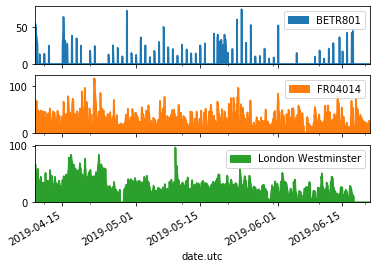

In [62]:
no2.pivot(columns='location',values='value').plot.area(subplots=True)

In [66]:
air_quality.pivot_table(values='value',index='location',columns='parameter',aggfunc='mean')

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


### 3.合并来自多个表的数据

In [68]:
air_quality_no2=pd.read_csv('csv/air_quality_no2_long.csv',parse_dates=True)

In [69]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,_g/m_
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,_g/m_
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,_g/m_
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,_g/m_
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,_g/m_


In [75]:
air_quality_no2=air_quality_no2[['date.utc','location','parameter','value']]

In [76]:
air_quality_pm25=pd.read_csv('csv/air_quality_pm25_long.csv')

In [77]:
air_quality_pm25=air_quality_pm25[['date.utc','location','parameter','value']]

In [79]:
air_quality_pm25.shape

(1110, 4)

In [80]:
air_quality_no2.shape

(2068, 4)

In [84]:
air_quality=pd.concat([air_quality_pm25,air_quality_no2],keys=['PM25','NO2'])

In [86]:
air_quality

date.utc            location parameter  value
PM25 0     2019-06-18 06:00:00+00:00             BETR801      pm25   18.0
     1     2019-06-17 08:00:00+00:00             BETR801      pm25    6.5
     2     2019-06-17 07:00:00+00:00             BETR801      pm25   18.5
     3     2019-06-17 06:00:00+00:00             BETR801      pm25   16.0
     4     2019-06-17 05:00:00+00:00             BETR801      pm25    7.5
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[3178 rows x 4 columns]

In [88]:
air_quality.sort_values('date.utc')

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,_g/m_
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,_g/m_
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,_g/m_
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,_g/m_
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,_g/m_
...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,_g/m_
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,_g/m_
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,_g/m_
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,_g/m_


### 4.处理时间序列

In [87]:
air_quality = pd.read_csv('csv/air_quality_no2_long.csv')

In [90]:
air_quality = air_quality.rename(columns={'date.utc':'datetime'})

In [91]:
air_quality['datetime']=pd.to_datetime(air_quality['datetime'])

In [92]:
air_quality['datetime'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [94]:
air_quality['datetime'].dt.weekday

0       4
1       3
2       3
3       3
4       3
       ..
2063    1
2064    1
2065    1
2066    1
2067    1
Name: datetime, Length: 2068, dtype: int64

In [95]:
air_quality['month']=air_quality['datetime'].dt.month

In [103]:
air_quality['hour']=air_quality['datetime'].dt.hour

In [100]:
air_quality.groupby(['month','location'])['value'].mean()

month  location          
5      BETR801               24.344156
       FR04014               27.908446
       London Westminster    28.158433
6      BETR801               31.916667
       FR04014               27.499272
       London Westminster    19.581152
Name: value, dtype: float64

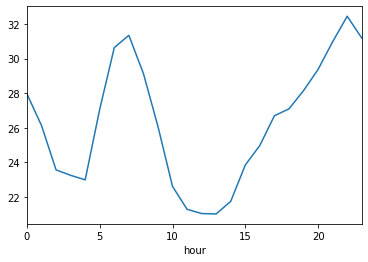

In [104]:
air_quality.groupby(['hour'])['value'].mean().plot()

### 5.处理文本数据